In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML
from matplotlib.animation import FuncAnimation

In [2]:
data_113 = np.loadtxt('dataset/20151026_113_labeled')
data_114 = np.loadtxt('dataset/20151026_114_labeled')
data = np.concatenate((data_113, data_114), axis=0)
features = data[:, :2]

In [3]:
K = 10
NUM_ITERATIONS = 20

# Record the centers of each iteration
centers_history = np.zeros((NUM_ITERATIONS, K, features.shape[1]))
labels_history = np.zeros((NUM_ITERATIONS, features.shape[0]))

# Initialize the centers
centers = np.linspace(np.min(features, axis=0),
                      np.max(features, axis=0), num=K)
# centers.shape = (K, features.shape[1])

for i in range(NUM_ITERATIONS):

    # Compute the distances between each data point and each center
    distances = np.zeros((K, features.shape[0]))
    for k in range(K):
        distances[k] = np.sum((features - centers[k]) ** 2, axis=1)

    # Assign each data point to the closest center
    labels = np.argmin(distances, axis=0)

    # Record the centers
    centers_history[i] = centers
    labels_history[i] = labels

    # Update the centers
    for k in range(K):
        centers[k] = np.mean(features[labels == k], axis=0)

In [4]:
# Generate evenly spaced test points in the 2D plane
x1 = range(0, 500, 1)
x2 = range(0, 500, 1)
test_points = np.array([(x, y)for x in x1 for y in x2])
# test_points.shape = (2500, 2)

test_labels_history = np.zeros((NUM_ITERATIONS, test_points.shape[0]),
                               dtype=np.int8)

for i in range(NUM_ITERATIONS):

    # Calculate the distance between each test point and each center
    distances = np.zeros((K, test_points.shape[0]))
    for k in range(K):
        distances[k] = np.sum((test_points - centers_history[i, k]) ** 2,
                              axis=1)

    # Assign the test point to the closest center
    test_labels_history[i] = np.argmin(distances, axis=0)

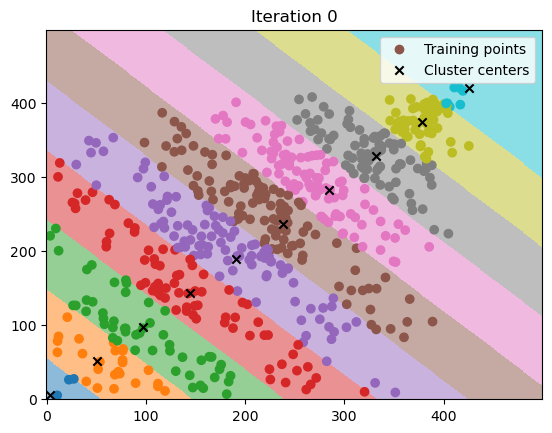

In [5]:
fig = plt.figure()
ax = fig.add_subplot()


def update(i: int):
    ax.cla()

    ax.pcolormesh(x1, x2,
                  test_labels_history[i].reshape((len(x1), len(x2)), order='F'),
                  cmap='tab10', alpha=0.5)

    # Plot the training points
    ax.scatter(features[:, 0], features[:, 1], c=labels_history[i],
               cmap='tab10', label='Training points')

    # Plot the centers
    ax.scatter(centers_history[i, :, 0],
               centers_history[i, :, 1],
               c='k', marker='x', label='Cluster centers')

    ax.set_title(f'Iteration {i}')
    ax.legend()


animation = FuncAnimation(fig, update, frames=NUM_ITERATIONS, interval=100)
HTML(animation.to_jshtml())